In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Getting Random Lats and Longs to Use

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1200)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1200)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-86.48029987594249, -153.35845278436773),
 (55.80731073329443, -98.37127685071508),
 (35.66379031967978, -109.73120892651997),
 (-30.974224253563236, 85.739147875806),
 (19.641143097576204, 165.88156795173785),
 (1.6515927076379597, -114.69942208149565),
 (31.55169647120887, -100.0625215922879),
 (60.33885719204801, -123.84993423130777),
 (19.60377885841973, -66.42732137509729),
 (24.57503491156534, 78.33065621509013),
 (-29.237236852076585, 119.6624459572061),
 (15.369781279236634, -146.6168950360314),
 (-18.932588305350265, 75.43888771614027),
 (-66.0030006824001, 16.31973616505212),
 (85.83266149645786, -28.023965939736087),
 (-41.66015911637801, 119.73786523376958),
 (45.824608601832665, 34.60631756455905),
 (-81.6730470485422, 16.292781741008184),
 (84.89393339201072, -136.72581011386862),
 (41.30313895545444, -33.59227329556347),
 (-72.6840837939137, 179.4438901682194),
 (-82.34971085044766, -4.413727100199452),
 (-63.11715140381867, 131.09245432732138),
 (-4.5369370822921695, 

# Getting the Closest City Using Lats and Longs

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

540

# Retrieving Weather Data using List of Cities using enumerate

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# find out what verion we are using to get requests
#requests.__version__

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
total_record_count = 0

# Loop through all the cities in the list.
for i, city in enumerate(cities):
   
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
    
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create URL for each each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record counts.
    record_count += 1
    total_record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()

        # Append data to city_data 
        city_data.append({"City": city.title(),
                          "Lat": city_weather["coord"]["lat"],
                          "Lng": city_weather["coord"]["lon"],
                          "Max Temp": city_weather["main"]["temp_max"],
                          "Humidity": city_weather["main"]["humidity"],
                          "Cloudiness": city_weather["clouds"]["all"], 
                          "Wind Speed": city_weather["wind"]["speed"],
                          "Country": city_weather["sys"]["country"], 
                          "Date": datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
print(f"Records found: {total_record_count}.")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | gallup
Processing Record 4 of Set 1 | carnarvon
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | san patricio
Processing Record 7 of Set 1 | san angelo
Processing Record 8 of Set 1 | fort nelson
Processing Record 9 of Set 1 | dorado
Processing Record 10 of Set 1 | pali
Processing Record 11 of Set 1 | northam
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | dzhankoy
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | kaitangata
Processing Record 21 of Set 1 | hermanus
P

Processing Record 39 of Set 4 | shaunavon
Processing Record 40 of Set 4 | nizwa
Processing Record 41 of Set 4 | octeville
Processing Record 42 of Set 4 | naze
Processing Record 43 of Set 4 | bandarbeyla
Processing Record 44 of Set 4 | grindavik
Processing Record 45 of Set 4 | skiros
City not found. Skipping...
Processing Record 46 of Set 4 | zhigansk
Processing Record 47 of Set 4 | stornoway
Processing Record 48 of Set 4 | pacifica
Processing Record 49 of Set 4 | sistranda
Processing Record 50 of Set 4 | baishishan
Processing Record 1 of Set 5 | kutum
Processing Record 2 of Set 5 | santa maria
Processing Record 3 of Set 5 | kapuskasing
Processing Record 4 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 5 of Set 5 | logstor
Processing Record 6 of Set 5 | tuatapere
Processing Record 7 of Set 5 | arraial do cabo
Processing Record 8 of Set 5 | bilma
Processing Record 9 of Set 5 | grand baie
Processing Record 10 of Set 5 | margate
Processing Record 11 of Set 5 | bluff

Processing Record 27 of Set 8 | eldikan
City not found. Skipping...
Processing Record 28 of Set 8 | ballina
Processing Record 29 of Set 8 | cukai
Processing Record 30 of Set 8 | boende
Processing Record 31 of Set 8 | banda aceh
Processing Record 32 of Set 8 | okmulgee
Processing Record 33 of Set 8 | rexburg
Processing Record 34 of Set 8 | fortuna
Processing Record 35 of Set 8 | normal
Processing Record 36 of Set 8 | celestun
Processing Record 37 of Set 8 | ust-kuyga
Processing Record 38 of Set 8 | belmonte
Processing Record 39 of Set 8 | havre-saint-pierre
Processing Record 40 of Set 8 | oranjemund
Processing Record 41 of Set 8 | vanavara
Processing Record 42 of Set 8 | outjo
Processing Record 43 of Set 8 | kavieng
Processing Record 44 of Set 8 | kaeo
Processing Record 45 of Set 8 | burnie
Processing Record 46 of Set 8 | pishin
Processing Record 47 of Set 8 | bengkulu
Processing Record 48 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 49 of Set 8 | la palma
Processing

# City Data List to DataFrame

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,63.00,45,83,5.39,NZ,2021-11-23 02:11:06
1,Thompson,55.7435,-97.8558,3.90,86,100,4.34,CA,2021-11-23 02:07:27
2,Gallup,35.5281,-108.7426,42.03,35,1,0.00,US,2021-11-23 02:14:02
3,Carnarvon,-24.8667,113.6333,78.87,36,0,13.80,AU,2021-11-23 02:14:03
4,Butaritari,3.0707,172.7902,81.95,77,22,11.56,KI,2021-11-23 02:09:53
5,San Patricio,28.0170,-97.5169,67.84,48,100,7.83,US,2021-11-23 02:14:03
6,San Angelo,31.4638,-100.4370,51.55,50,1,3.00,US,2021-11-23 02:13:55
7,Fort Nelson,58.8053,-122.7002,3.51,93,100,10.63,CA,2021-11-23 02:13:41
8,Dorado,18.4588,-66.2677,80.49,93,67,5.95,PR,2021-11-23 02:14:03
9,Pali,25.7667,73.3333,66.00,26,0,2.93,IN,2021-11-23 02:14:04


In [11]:
# Reorder Columns: City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

#Assign a new or the same DataFrame with new column order:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2021-11-23 02:11:06,-46.1927,168.8643,63.00,45,83,5.39
1,Thompson,CA,2021-11-23 02:07:27,55.7435,-97.8558,3.90,86,100,4.34
2,Gallup,US,2021-11-23 02:14:02,35.5281,-108.7426,42.03,35,1,0.00
3,Carnarvon,AU,2021-11-23 02:14:03,-24.8667,113.6333,78.87,36,0,13.80
4,Butaritari,KI,2021-11-23 02:09:53,3.0707,172.7902,81.95,77,22,11.56
...,...,...,...,...,...,...,...,...,...
492,Raton,US,2021-11-23 02:24:36,36.9034,-104.4391,46.74,23,1,5.75
493,Batticaloa,LK,2021-11-23 02:26:09,7.7102,81.6924,77.41,87,100,5.03
494,Tingo Maria,PE,2021-11-23 02:26:10,-9.2895,-76.0088,69.94,97,84,1.72
495,Ondjiva,AO,2021-11-23 02:26:10,-17.0667,15.7333,69.91,21,47,4.79


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Start of Plotting

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

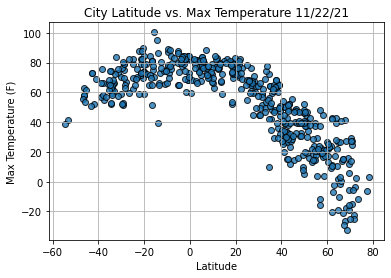

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")
# Show plot.
plt.show()

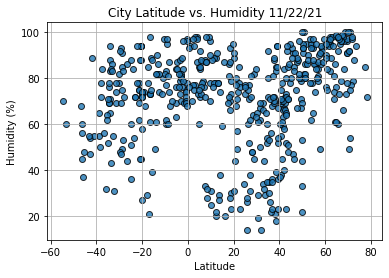

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

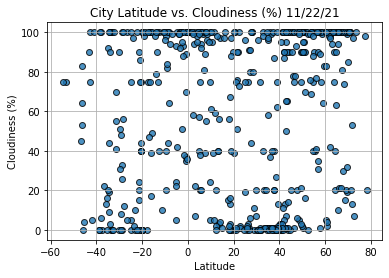

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

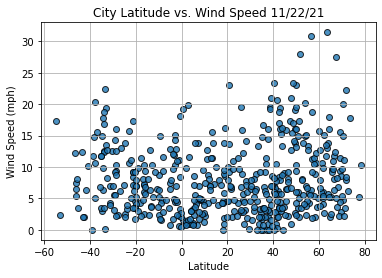

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# Linear Regression on Weather Data

In [18]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    correlation_coefficient = r_value
    print (f"Correlation coefficient is: {r_value:.3f}")
    print (f"Probability value is: {p_value:.3f}")
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    
    plt.show()


# Creating DataFrames for Northern and Southern Hemispheres (using equator's Latitude)

In [20]:
index13 = city_data_df.loc[13]
index13

City                       Albany
Country                        US
Date          2021-11-23 02:11:07
Lat                       42.6001
Lng                      -73.9662
Max Temp                    33.37
Humidity                       72
Cloudiness                     13
Wind Speed                   8.48
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4       True
       ...  
492     True
493     True
494    False
495    False
496     True
Name: Lat, Length: 497, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Thompson,CA,2021-11-23 02:07:27,55.7435,-97.8558,3.90,86,100,4.34
2,Gallup,US,2021-11-23 02:14:02,35.5281,-108.7426,42.03,35,1,0.00
4,Butaritari,KI,2021-11-23 02:09:53,3.0707,172.7902,81.95,77,22,11.56
5,San Patricio,US,2021-11-23 02:14:03,28.0170,-97.5169,67.84,48,100,7.83
6,San Angelo,US,2021-11-23 02:13:55,31.4638,-100.4370,51.55,50,1,3.00


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

Correlation coefficient is: -0.870
Probability value is: 0.000


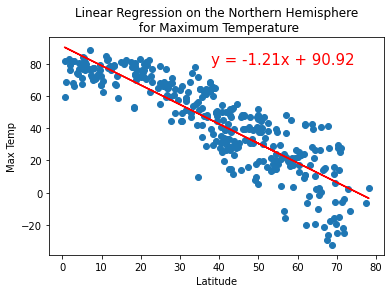

In [24]:
# Linear regression on the Northern Hemisphere for Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere\n for Maximum Temperature''', 'Max Temp',(38,80))

Correlation coefficient is: 0.577
Probability value is: 0.000


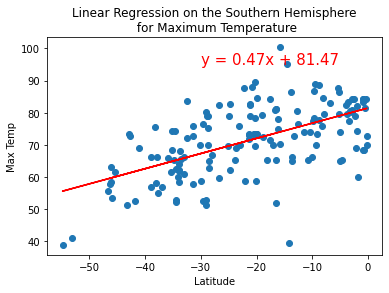

In [25]:
# Linear regression on the Southern Hemisphere for Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere\n for Maximum Temperature''', 'Max Temp',(-30,95))

Correlation coefficient is: 0.266
Probability value is: 0.000


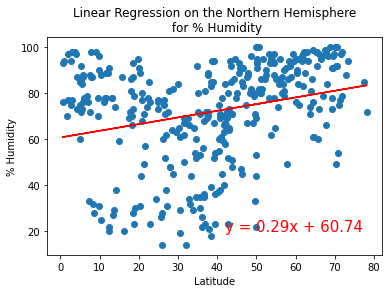

In [26]:
# Linear regression on the Northern Hemisphere for Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere\n for % Humidity''','% Humidity',(42,20))


Correlation coefficient is: 0.341
Probability value is: 0.000


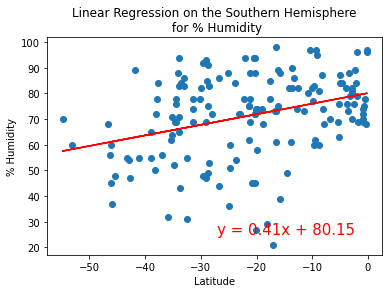

In [27]:
# Linear regression on the Southern Hemisphere for Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere\n for % Humidity''', '% Humidity',(-27,25))


Correlation coefficient is: 0.116
Probability value is: 0.033


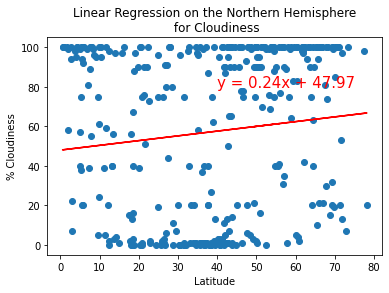

In [28]:
# Linear regression on the Northern Hemisphere for % Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere\n for Cloudiness''', '% Cloudiness',(40,80))

Correlation coefficient is: 0.292
Probability value is: 0.000


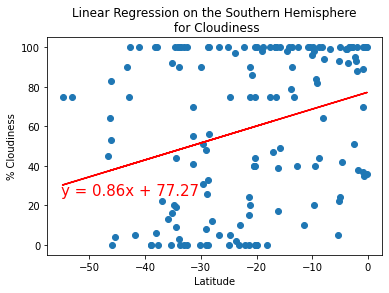

In [29]:
# Linear regression on the Southern Hemisphere for % Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere\n for Cloudiness''', '% Cloudiness',(-55,25))

Correlation coefficient is: 0.241
Probability value is: 0.000


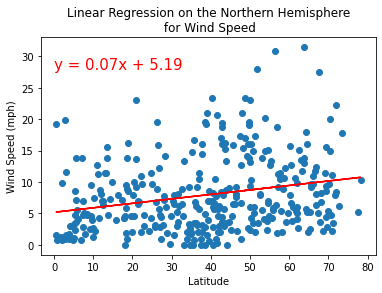

In [30]:
# Linear regression on the Northern Hemisphere for Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere\n for Wind Speed''', 'Wind Speed (mph)',(0,28))

Correlation coefficient is: -0.206
Probability value is: 0.010


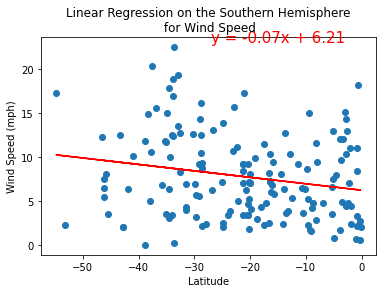

In [31]:
# Linear regression on the Southern Hemisphere for Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere\n for Wind Speed''', 'Wind Speed (mph)',(-27,23))